In [1]:
library(tidyverse)
library(ggplot2)
library(corrplot)
library(VIM)
library(vcd)
library(DataExplorer)
library(FactoMineR)
library(factoextra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.92 loaded

Loading required package: colorspace

Loading required package: grid

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, were retired in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding 

In [45]:
ps_df_1 <- read_csv("./decimation_data/1_results.csv")
ps_df_1 <- ps_df_1 %>%
  mutate(reduction = seq(0.01, 0.99, by = 0.01))
head(ps_df_1, 10)

Rows: 99 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (6): reduction, abs_mean, abs_max, rel_mean, rel_max, bbox

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


reduction,abs_mean,abs_max,rel_mean,rel_max,bbox
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.01,3.848407e-07,2.367549e-05,4.592861e-07,2.825539e-05,83.79106
0.02,5.804616e-07,3.904620e-05,6.927489e-07,4.659948e-05,83.79106
0.03,8.652889e-07,5.951552e-05,1.032675e-06,7.102849e-05,83.79106
0.04,1.228202e-06,7.263126e-05,1.465791e-06,8.668139e-05,83.79106
0.05,1.658049e-06,8.244712e-05,1.978790e-06,9.839608e-05,83.79106
0.06,2.152847e-06,1.045118e-04,2.569304e-06,1.247290e-04,83.79106
0.07,2.706205e-06,1.045335e-04,3.229706e-06,1.247550e-04,83.79106
0.08,3.315630e-06,1.130894e-04,3.957021e-06,1.349660e-04,83.79106
0.09,3.981751e-06,1.165044e-04,4.752000e-06,1.390415e-04,83.79106


In [46]:
ps_df_2 <- read_csv("/media/valentino/Lothric/tfm/decimation_exps/145-R_results.csv")
ps_df_2 <- ps_df_2 %>%
  mutate(reduction = seq(0.01, 0.99, by = 0.01))
head(ps_df_2, 10)

ps_df_3 <- read_csv("/media/valentino/Lothric/tfm/decimation_exps/146-L_results.csv")
ps_df_3 <- ps_df_3 %>%
  mutate(reduction = seq(0.01, 0.99, by = 0.01))
head(ps_df_3, 10)

ps_df_4 <- read_csv("/media/valentino/Lothric/tfm/decimation_exps/222-L_results.csv")
ps_df_4 <- ps_df_4 %>%
  mutate(reduction = seq(0.01, 0.99, by = 0.01))
head(ps_df_4, 10)

ps_df_5 <- read_csv("/media/valentino/Lothric/tfm/decimation_exps/309-R_results.csv")
ps_df_5 <- ps_df_5 %>%
  mutate(reduction = seq(0.01, 0.99, by = 0.01))
head(ps_df_5, 10)

ps_df_6 <- read_csv("/media/valentino/Lothric/tfm/decimation_exps/348-L_results.csv")
ps_df_6 <- ps_df_6 %>%
  mutate(reduction = seq(0.01, 0.99, by = 0.01))
head(ps_df_6, 10)

ps_df_7 <- read_csv("/media/valentino/Lothric/tfm/decimation_exps/418-L_results.csv")
ps_df_7 <- ps_df_7 %>%
  mutate(reduction = seq(0.01, 0.99, by = 0.01))
head(ps_df_7, 10)

ps_df_8 <- read_csv("/media/valentino/Lothric/tfm/decimation_exps/460-L_results.csv")
ps_df_8 <- ps_df_8 %>%
  mutate(reduction = seq(0.01, 0.99, by = 0.01))
head(ps_df_8, 10)

ps_df_9 <- read_csv("/media/valentino/Lothric/tfm/decimation_exps/465-R_results.csv")
ps_df_9 <- ps_df_9 %>%
  mutate(reduction = seq(0.01, 0.99, by = 0.01))
head(ps_df_9, 10)

ps_df_10 <- read_csv("/media/valentino/Lothric/tfm/decimation_exps/473-L_results.csv")
ps_df_10 <- ps_df_10 %>%
  mutate(reduction = seq(0.01, 0.99, by = 0.01))
head(ps_df_10, 10)

Rows: 99 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (6): reduction, abs_mean, abs_max, rel_mean, rel_max, bbox

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


reduction,abs_mean,abs_max,rel_mean,rel_max,bbox
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.01,1.047756e-06,0.0001526576,1.681303e-06,0.0002449652,62.31807
0.02,2.526910e-06,0.0002759998,4.054859e-06,0.0004428889,62.31807
0.03,4.740022e-06,0.0003930720,7.606175e-06,0.0006307512,62.31807
0.04,7.495671e-06,0.0005225934,1.202809e-05,0.0008385905,62.31807
0.05,1.080941e-05,0.0005763923,1.734555e-05,0.0009249200,62.31807
0.06,1.462101e-05,0.0006109505,2.346191e-05,0.0009803744,62.31807
0.07,1.886311e-05,0.0007874956,3.026909e-05,0.0012636713,62.31807
0.08,2.354555e-05,0.0008415827,3.778287e-05,0.0013504632,62.31807
0.09,2.868093e-05,0.0009508685,4.602345e-05,0.0015258311,62.31807


Rows: 99 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (6): reduction, abs_mean, abs_max, rel_mean, rel_max, bbox

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


reduction,abs_mean,abs_max,rel_mean,rel_max,bbox
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.01,9.444724e-07,0.0001347702,1.530699e-06,0.0002184210,61.70203
0.02,2.303912e-06,0.0002677333,3.733933e-06,0.0004339133,61.70203
0.03,4.289774e-06,0.0006384929,6.952403e-06,0.0010348005,61.70203
0.04,6.823379e-06,0.0006384929,1.105860e-05,0.0010348005,61.70203
0.05,9.893637e-06,0.0009595608,1.603454e-05,0.0015551528,61.70203
0.06,1.336216e-05,0.0014326327,2.165595e-05,0.0023218568,61.70203
0.07,1.730780e-05,0.0014326327,2.805062e-05,0.0023218568,61.70203
0.08,2.165175e-05,0.0014326327,3.509082e-05,0.0023218568,61.70203
0.09,2.641883e-05,0.0014326327,4.281680e-05,0.0023218568,61.70203


Rows: 99 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (6): reduction, abs_mean, abs_max, rel_mean, rel_max, bbox

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


reduction,abs_mean,abs_max,rel_mean,rel_max,bbox
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.01,9.741951e-07,0.0001560379,1.359337e-06,0.0002177265,71.66693
0.02,2.342014e-06,0.0002379073,3.267915e-06,0.0003319625,71.66693
0.03,4.383867e-06,0.0003536964,6.117001e-06,0.0004935281,71.66693
0.04,7.031196e-06,0.0004996263,9.810935e-06,0.0006971504,71.66693
0.05,1.022678e-05,0.0005398461,1.426987e-05,0.0007532709,71.66693
0.06,1.392801e-05,0.0006626269,1.943436e-05,0.0009245922,71.66693
0.07,1.807365e-05,0.0007616343,2.521895e-05,0.0010627416,71.66693
0.08,2.265100e-05,0.0009408904,3.160592e-05,0.0013128655,71.66693
0.09,2.764928e-05,0.0009536858,3.858025e-05,0.0013307195,71.66693


Rows: 99 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (6): reduction, abs_mean, abs_max, rel_mean, rel_max, bbox

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


reduction,abs_mean,abs_max,rel_mean,rel_max,bbox
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.01,1.104201e-06,0.0001657352,1.378658e-06,0.0002069298,80.09248
0.02,2.592735e-06,0.0003101977,3.237177e-06,0.0003872995,80.09248
0.03,4.830396e-06,0.0004161052,6.031024e-06,0.0005195309,80.09248
0.04,7.715699e-06,0.0005653428,9.633488e-06,0.0007058625,80.09248
0.05,1.122344e-05,0.0006499818,1.401311e-05,0.0008115391,80.09248
0.06,1.525546e-05,0.0007771972,1.904731e-05,0.0009703748,80.09248
0.07,1.982139e-05,0.0009482357,2.474813e-05,0.0011839260,80.09248
0.08,2.491829e-05,0.0010277713,3.111190e-05,0.0012832307,80.09248
0.09,3.044938e-05,0.0010277713,3.801778e-05,0.0012832307,80.09248


Rows: 99 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (6): reduction, abs_mean, abs_max, rel_mean, rel_max, bbox

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


reduction,abs_mean,abs_max,rel_mean,rel_max,bbox
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.01,9.527673e-07,0.0001283490,1.581027e-06,0.0002129830,60.26256
0.02,2.368386e-06,0.0002561624,3.930112e-06,0.0004250772,60.26256
0.03,4.475239e-06,0.0003423815,7.426234e-06,0.0005681497,60.26256
0.04,7.151940e-06,0.0004650322,1.186797e-05,0.0007716768,60.26256
0.05,1.035271e-05,0.0005439201,1.717935e-05,0.0009025838,60.26256
0.06,1.409807e-05,0.0007206501,2.339441e-05,0.0011958506,60.26256
0.07,1.831685e-05,0.0008375013,3.039508e-05,0.0013897540,60.26256
0.08,2.299658e-05,0.0008439989,3.816064e-05,0.0014005361,60.26256
0.09,2.803133e-05,0.0010650933,4.651533e-05,0.0017674214,60.26256


Rows: 99 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (6): reduction, abs_mean, abs_max, rel_mean, rel_max, bbox

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


reduction,abs_mean,abs_max,rel_mean,rel_max,bbox
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.01,1.004008e-06,0.0001292259,1.418014e-06,0.0001825126,70.80384
0.02,2.382270e-06,0.0002792525,3.364606e-06,0.0003944031,70.80384
0.03,4.422939e-06,0.0004953866,6.246750e-06,0.0006996606,70.80384
0.04,7.022310e-06,0.0005343612,9.917978e-06,0.0007547066,70.80384
0.05,1.012019e-05,0.0005343612,1.429328e-05,0.0007547066,70.80384
0.06,1.367496e-05,0.0005736809,1.931387e-05,0.0008102398,70.80384
0.07,1.766496e-05,0.0008434866,2.494916e-05,0.0011913007,70.80384
0.08,2.209063e-05,0.0008696791,3.119976e-05,0.0012282937,70.80384
0.09,2.693399e-05,0.0008696791,3.804029e-05,0.0012282937,70.80384


Rows: 99 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (6): reduction, abs_mean, abs_max, rel_mean, rel_max, bbox

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


reduction,abs_mean,abs_max,rel_mean,rel_max,bbox
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.01,9.197445e-07,0.0001301138,1.351582e-06,0.0001912047,68.04948
0.02,2.049547e-06,0.0002080589,3.011848e-06,0.0003057465,68.04948
0.03,3.686510e-06,0.0003341783,5.417396e-06,0.0004910814,68.04948
0.04,5.766774e-06,0.0004370201,8.474384e-06,0.0006422093,68.04948
0.05,8.230456e-06,0.0004766337,1.209481e-05,0.0007004223,68.04948
0.06,1.108442e-05,0.0004918940,1.628876e-05,0.0007228475,68.04948
0.07,1.425687e-05,0.0006855241,2.095074e-05,0.0010073907,68.04948
0.08,1.775077e-05,0.0006855241,2.608509e-05,0.0010073907,68.04948
0.09,2.159357e-05,0.0007500299,3.173216e-05,0.0011021832,68.04948


Rows: 99 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (6): reduction, abs_mean, abs_max, rel_mean, rel_max, bbox

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


reduction,abs_mean,abs_max,rel_mean,rel_max,bbox
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.01,8.501349e-07,0.0001130985,1.290234e-06,0.0001716476,65.88997
0.02,1.917918e-06,0.0002253794,2.910790e-06,0.0003420541,65.88997
0.03,3.513385e-06,0.0002838446,5.332200e-06,0.0004307858,65.88997
0.04,5.549929e-06,0.0003863584,8.423026e-06,0.0005863691,65.88997
0.05,7.982679e-06,0.0004088588,1.211517e-05,0.0006205175,65.88997
0.06,1.076820e-05,0.0005505210,1.634269e-05,0.0008355156,65.88997
0.07,1.391230e-05,0.0006469244,2.111444e-05,0.0009818254,65.88997
0.08,1.735458e-05,0.0006841803,2.633873e-05,0.0010383679,65.88997
0.09,2.111567e-05,0.0007223990,3.204687e-05,0.0010963718,65.88997


Rows: 99 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (6): reduction, abs_mean, abs_max, rel_mean, rel_max, bbox

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


reduction,abs_mean,abs_max,rel_mean,rel_max,bbox
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.01,1.054814e-06,0.0001075216,1.282182e-06,0.0001306982,82.26708
0.02,2.155643e-06,0.0002025358,2.620299e-06,0.0002461930,82.26708
0.03,3.797989e-06,0.0002877818,4.616657e-06,0.0003498140,82.26708
0.04,5.886359e-06,0.0003562435,7.155181e-06,0.0004330329,82.26708
0.05,8.364720e-06,0.0004252109,1.016776e-05,0.0005168664,82.26708
0.06,1.123893e-05,0.0005599572,1.366151e-05,0.0006806577,82.26708
0.07,1.449988e-05,0.0006540919,1.762537e-05,0.0007950834,82.26708
0.08,1.805726e-05,0.0006540919,2.194955e-05,0.0007950834,82.26708
0.09,2.190958e-05,0.0007195467,2.663226e-05,0.0008746472,82.26708


In [25]:
mean(c(0.0011347743, 0.0011021832, 0.0013386774, 0.0017674214, 0.0015391306, 0.0014870315, 0.0023218568, 0.0016754065, 1.271815e-02	))

[1] 0.002787181

In [47]:
dfs <- list(ps_df_1, ps_df_2, ps_df_3, ps_df_4, ps_df_5, ps_df_6, ps_df_7, ps_df_8, ps_df_9, ps_df_10)
combined_df <- do.call(rbind, dfs)

In [48]:
result_df <- combined_df %>%
  group_by(reduction) %>%
  summarise(
    rel_mean = mean(rel_mean),
    rel_max = mean(rel_max),
    .groups = 'drop'  # to ungroup
  )

tail(result_df, 11)

reduction,rel_mean,rel_max
<dbl>,<dbl>,<dbl>
0.89,0.005008071,0.2466610
0.90,0.005420749,0.2983845
0.91,0.005905281,0.3290960
0.92,0.006492282,0.6247268
0.93,0.007219658,0.7084255
0.94,0.008136061,0.7905111
0.95,0.009334252,0.9098470
0.96,0.011001471,1.0006390
0.97,0.013519270,1.2391398


In [58]:
save <- FALSE

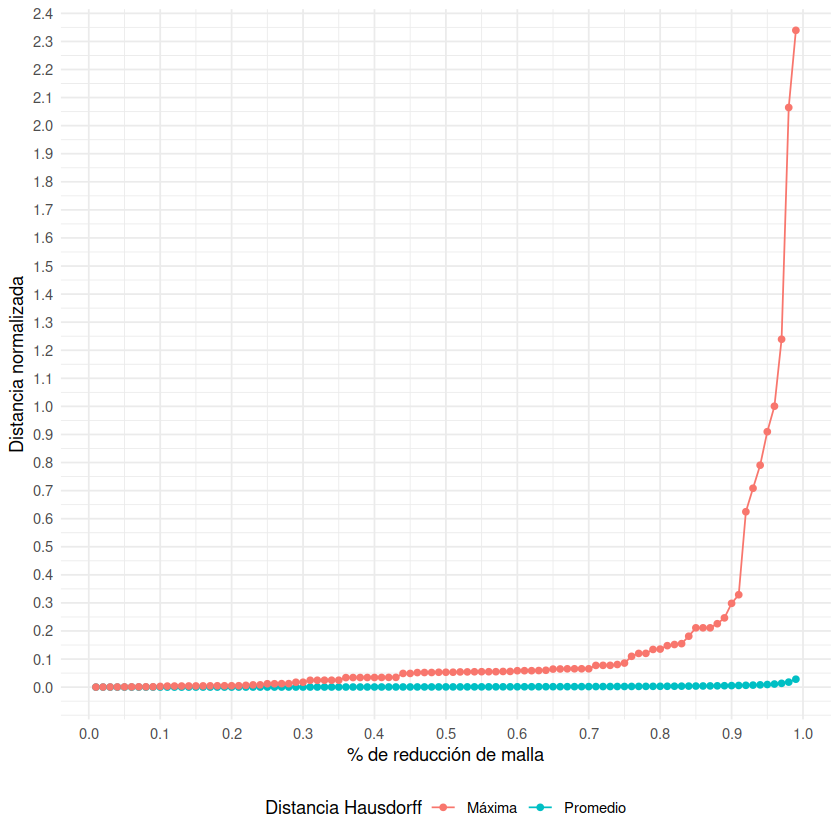

In [61]:
ps_df_long <- result_df %>%
  pivot_longer(cols = c(rel_mean, rel_max), 
               names_to = "metric", values_to = "value") %>%
  mutate(metric = recode(metric,
                         rel_mean = "Promedio",
                         rel_max = "Máxima"))

# Create the line plot
ggplot(ps_df_long, aes(x = reduction, y = value, color = metric)) +
  geom_line() +
  geom_point() +  # Optional: adds points on the lines
  labs(x = "% de reducción de malla",
       y = "Distancia normalizada",
       color = "Distancia Hausdorff") +
  scale_x_continuous(breaks = seq(0, 1, by = 0.1)) +  # Add tick every 10 units
  scale_y_continuous(breaks = seq(0, 3, by = 0.1)) +  # Add tick every 10 units
  theme_minimal() +
  coord_cartesian(ylim = c(0, 2.3)) + 
  theme(legend.position = "bottom") 


if(save)
{
    save_path <- str_c("../../../docs/report/figures/5_experiments/mesh_redux_study.pdf")
    ggsave(save_path, width = 6, height = 4.5, dpi = 100)
}